# Perspective transform image

NOTE: this file is only an example to explain the perspective transform process applied. The class used in the project is in `~/src/camera.py`

In [1]:
root_folder = '../'

import sys 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

sys.path.append(root_folder + 'src/')

from camera import camera

%matplotlib inline

 Calibrate camera

In [2]:
cam = camera(root_folder + 'camera_cal/calibration*.jpg')

# Call calibration function
cam.calibrate()

# Analyse lanes

- Load an image where lanes are straight I'll use `test_images/straight_lines1.jpg`
- Pick four points and draw a trapezoidal shape on the image to get best points

True

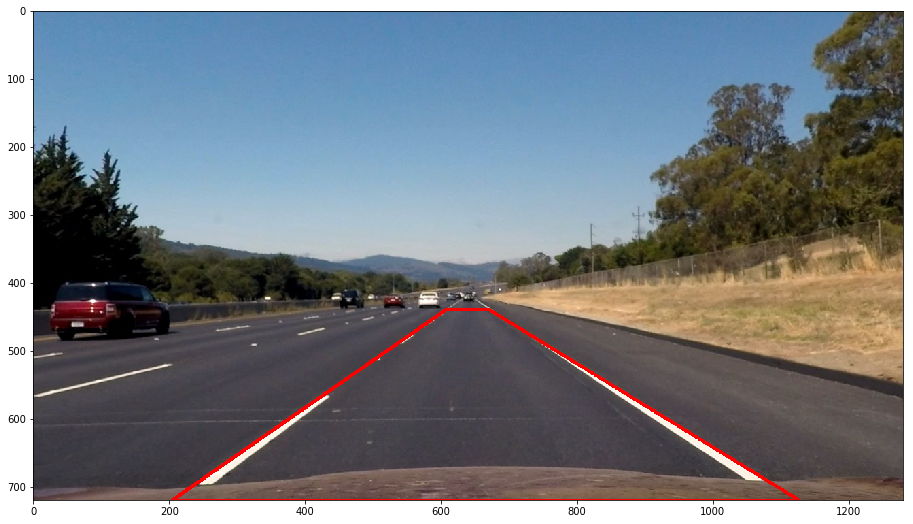

In [5]:
img = cam.undistort(mpimg.imread(root_folder + 'test_images/straight_lines2.jpg'))

# img = cam.undistort(mpimg.imread(root_folder + 'examples/video_project1.jpg'))

# Define a function to draw a shape on the original image
def draw_shape(img, vertices, color=[255, 0, 0], thickness=3):
    shape = np.copy(img)
    prev_y, prev_x = vertices[-1]
    
    for y, x in vertices:
        cv2.line(shape, ( prev_x, prev_y), (x,y), color, thickness)
        prev_y, prev_x = (y, x)
    
    return shape

height = img.shape[0]
width = img.shape[1]

top_margin = 440

vertices = [
    (top_margin, 607), # top left
    (top_margin, 671), # top right
    (height, 1127), # bottom right
    (height,  204), # bottom left
]

shape_img = draw_shape(img, vertices)

plt.figure(figsize = (16,9))
plt.imshow(shape_img)

cv2.imwrite(root_folder + 'examples/warp_area.jpg', cv2.cvtColor(cv2.resize(shape_img, (640,320)), cv2.COLOR_BGR2RGB))


# Calculate transform coefficients

Use founded vertices as source and define the corresponding vertices into a 2D image


True

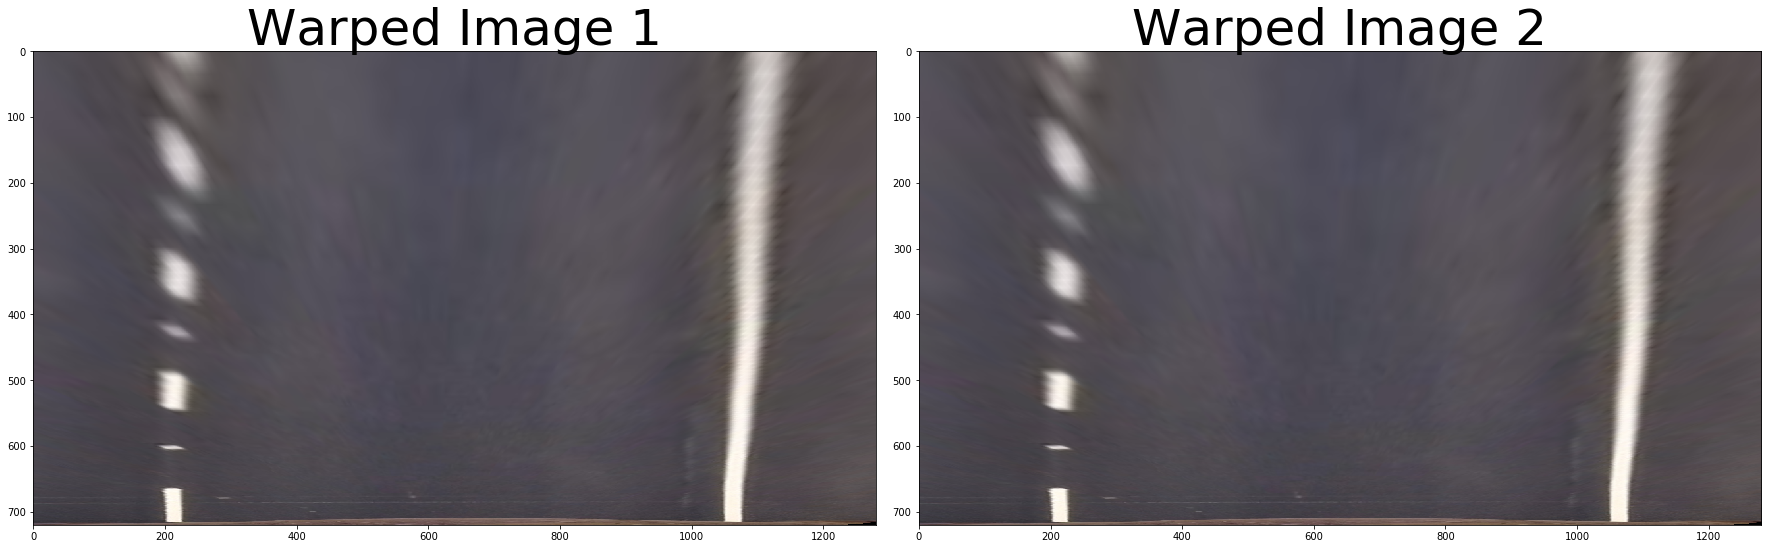

In [7]:

src = np.float32([(x, y) for y, x in vertices])

img_size = (img.shape[1], img.shape[0])

dst = np.float32([
    (200, 0), # top left
    (1080, 0), # top right
    (1080, height, ), # bottom right
    (200, height ), # bottom left
])

# Calculate transform coefficients
M = cv2.getPerspectiveTransform(src, dst)

img2 = cam.undistort(mpimg.imread(root_folder + 'test_images/straight_lines2.jpg'))

# Try to warp the test image
warped1 = cv2.warpPerspective(img2, M, img_size, flags=cv2.INTER_LINEAR)
warped2 = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

# Show original and warped image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(warped1)
ax1.set_title('Warped Image 1', fontsize=50)
ax2.imshow(warped2)
ax2.set_title('Warped Image 2', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

cv2.imwrite(root_folder + 'examples/warped.jpg', cv2.cvtColor(cv2.resize(warped1, (640,320)), cv2.COLOR_BGR2RGB))


# Store coefficients

I've stored the perspective transform coefficients obtained into the `camera.py` 

In [5]:
print(M)

[[ -6.83406679e-01  -1.49106912e+00   1.05949780e+03]
 [ -1.03250741e-14  -1.92803521e+00   8.67615843e+02]
 [ -1.45283091e-17  -2.39307389e-03   1.00000000e+00]]


# Try use `camera.py` to warp the image

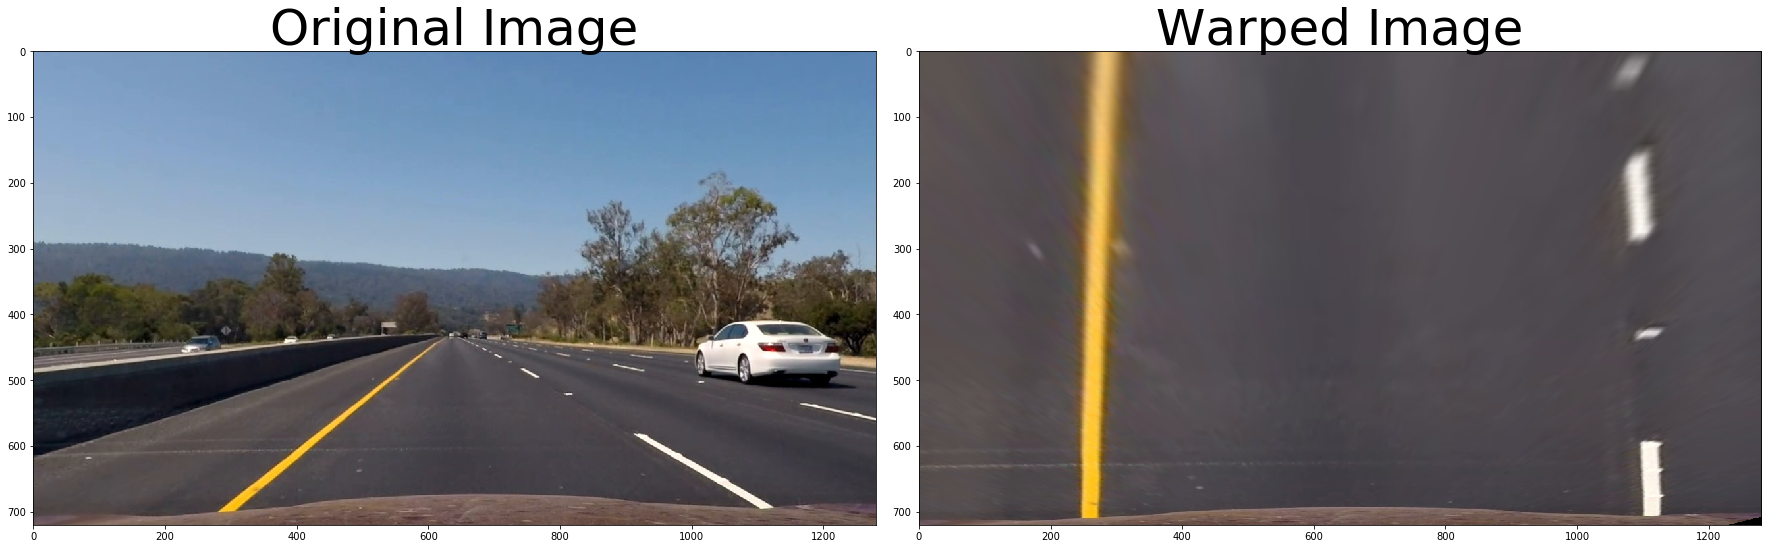

In [22]:
# Read new test image
test2 = mpimg.imread(root_folder + 'examples/video_project1.jpg')

print()
# Undistort the image
test2 = cam.undistort(test2)

test2_warped = cam.birdsEyeTranform(test2)

# Show original and warped image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test2)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(test2_warped)
ax2.set_title('Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Try to unwarp the image

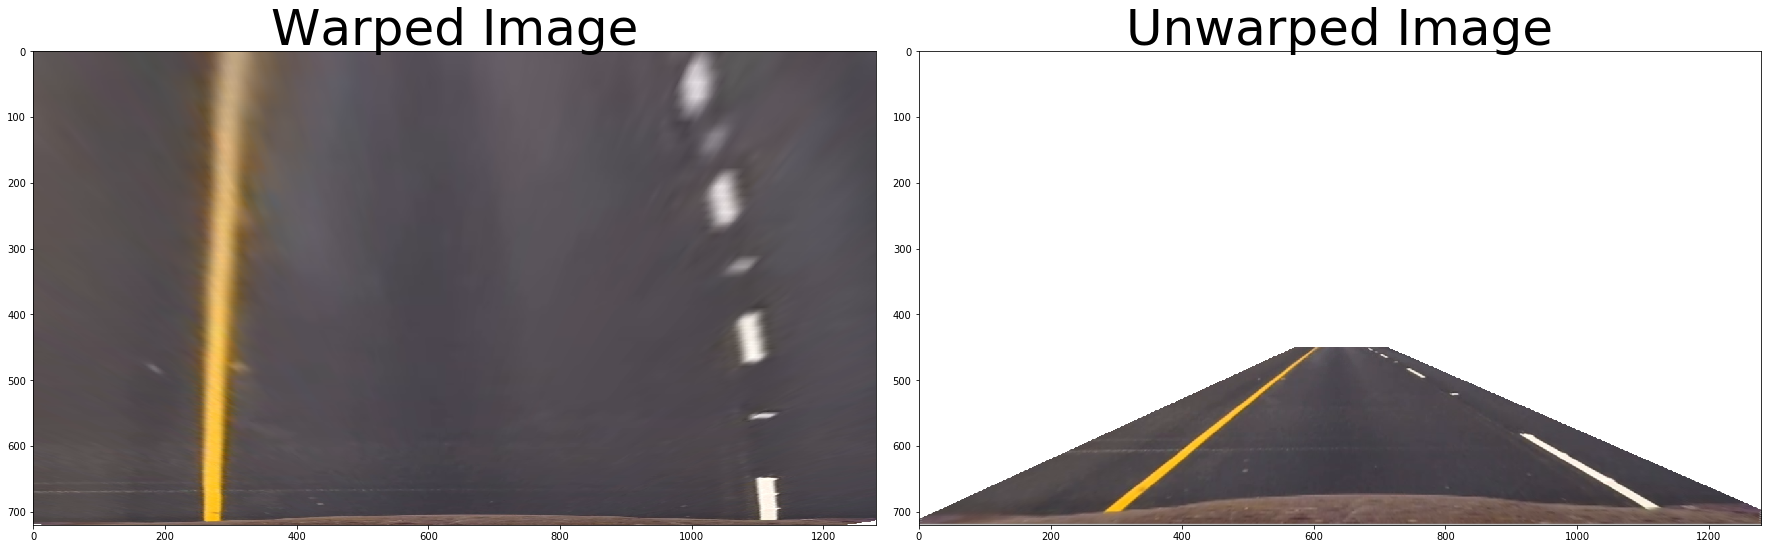

In [46]:
test2_unwarped = cam.unwarp(test2_warped)

# Show original and warped image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test2_warped)
ax1.set_title('Warped Image', fontsize=50)
ax2.imshow(test2_unwarped)
ax2.set_title('Unwarped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)